# Image Scraper

In [1]:
from fastai.vision import download_images, Path, verify_images, ImageDataBunch, get_transforms, imagenet_stats
from os import listdir, getcwd
from os.path import join
import numpy as np
from time import time

## Seting workspace vaiables and labels to be downloaded

In [2]:
PATH = getcwd()
DATA_DIR = join(PATH,'data')
LABELS = listdir(DATA_DIR)

## Downloading the images
To download the images' URLs follow this steps:

1. Go to google images and search for the class of your choice
2. Scroll down untill you think you have enough images
3. Open the browser's dev console and copy the following js snippet into it:
```JavaScript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```
4. Save the .csv file as *class*URLs.csv in the ./data/*class* directory
5. Repeat for each class you plan to have on your dataset
6. Finally run the code block below:

In [3]:
for label in LABELS:
    directory = label
    csv = f'{label}/{label}URLs.csv'
    path = Path(DATA_DIR)
    dest = path/directory
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/csv, dest, max_pics=200)

## Confirming the paths for the files are set

In [4]:
path.ls()

[PosixPath('/Users/daniel/Documents/Personal/projects/imageScraper/data/rattlesnake'),
 PosixPath('/Users/daniel/Documents/Personal/projects/imageScraper/data/cobra')]

## Verifying downloaded images

In [5]:
for label in LABELS:
    print(label)
    verify_images(Path(DATA_DIR)/label, delete=True, max_size=500)


rattlesnake


cobra


## Using FastAI1 utils to build and visualize data

In [9]:
np.random.seed(int(time()))
data = ImageDataBunch.from_folder(Path(DATA_DIR), train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

/Users/daniel/Documents/Personal/projects/imageScraper/.venv/lib/python3.9/site-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  return _solve_func(B,A)[0][:,0]


## Visualizing images

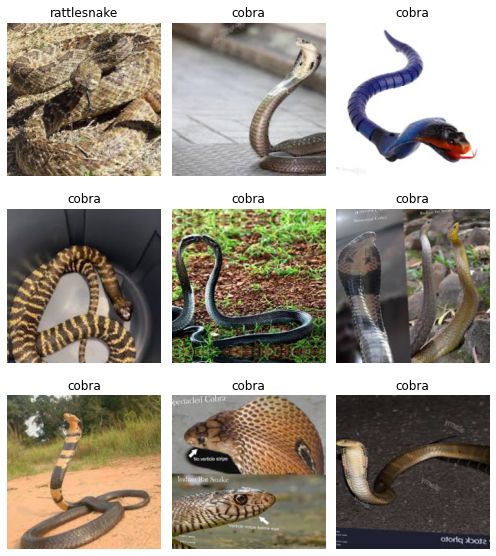

In [10]:
data.show_batch(rows=3, figsize=(7,8))

## Brief description of the dataset

In [11]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cobra', 'rattlesnake'], 2, 143, 35)